# Stock Price Predictor for Netflix Dataset



# Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
# 1. Load dataset
# -----------------------------
df = pd.read_csv(r"C:\Users\verma\Downloads\Netflix Dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")


# Explore Data Structure

In [27]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nStatistical Summary (Numerical):\n", df.describe())

Shape of dataset: (5531, 11)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 5531 entries, 9 to 5539
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5531 non-null   datetime64[ns]
 1   Open       5531 non-null   float64       
 2   High       5531 non-null   float64       
 3   Low        5531 non-null   float64       
 4   Close      5531 non-null   float64       
 5   Adj Close  5531 non-null   float64       
 6   Volume     5531 non-null   int64         
 7   lag_1      5531 non-null   float64       
 8   lag_5      5531 non-null   float64       
 9   sma_5      5531 non-null   float64       
 10  sma_10     5531 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 518.5 KB

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
lag_1        0
lag_5        0
sma_5        0
sma

# Unique Values per Column

In [28]:
print("\nUnique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique values per column:

Date: 5531 unique values
Open: 4962 unique values
High: 4963 unique values
Low: 4949 unique values
Close: 5048 unique values
Adj Close: 5048 unique values
Volume: 5366 unique values
lag_1: 5048 unique values
lag_5: 5048 unique values
sma_5: 5499 unique values
sma_10: 5515 unique values


# 2. Feature Engineering

In [29]:
df["lag_1"] = df["Close"].shift(1)      # yesterday’s close
df["lag_5"] = df["Close"].shift(5)      # 5 days ago close
df["sma_5"] = df["Close"].rolling(5).mean()   # 5-day moving avg
df["sma_10"] = df["Close"].rolling(10).mean() # 10-day moving avg


In [30]:
df = df.dropna()  # drop rows with NaN

# 3. Features and target

In [20]:
X = df[["lag_1", "lag_5", "sma_5", "sma_10", "Volume"]]
y = df["Close"]


In [21]:
# Train/test split (80/20 chronological)
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = df["Date"].iloc[split_idx:]


# 4. Train models

In [22]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)


In [23]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # fixed
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MAE  = {mae:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R²   = {r2:.4f}\n")


# 6. Plot results

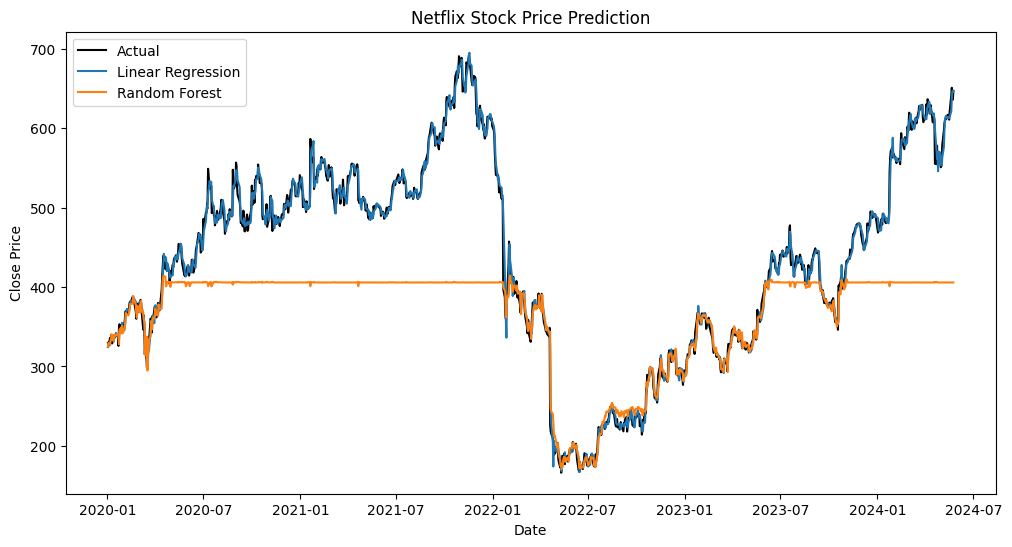

In [25]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test, label="Actual", color="black")
plt.plot(dates_test, y_pred_lr, label="Linear Regression")
plt.plot(dates_test, y_pred_rf, label="Random Forest")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
